## FGSM

In [5]:
import numpy as np
from PIL import Image
import cv2
import time
import os
import gdown
from IPython.display import display

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

E:\Program Files\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


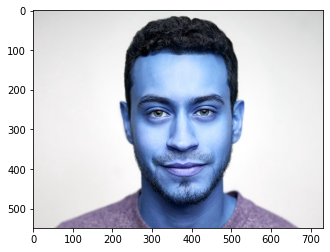

In [7]:
image_path='face.jpg'
# img=tf.image.decode_image(tf.io.read_file(image_path))
img=cv2.imread(image_path)
plt.imshow(img)

In [8]:
# loading yoloface model
full_weight_path=os.path.join(os.getcwd(),'.yoloface','face_detection.weights') #weight file path
full_cfg_path=os.path.join(os.getcwd(),'.yoloface','face_detection.cfg')
full_net = cv2.dnn.readNet(full_weight_path,full_cfg_path)

In [9]:
from tensorflow.keras.models import load_model
from PIL import Image

In [98]:
# def preprocess(image, size):
#     ih, iw, _ = image.shape
#     w, h = size
#     scale = min(w/iw, h/ih)
#     nw = int(iw*scale)
#     nh = int(ih*scale)
#     image = tf.cast(image, tf.float32)
#     image = tf.image.resize(image, (nw, nw))
#     return image

In [85]:
# def letterbox_image(image, size):
#     '''resize image with unchanged aspect ratio using padding'''
#     iw, ih = image.size
#     w, h = size
#     scale = min(w/iw, h/ih)
#     nw = int(iw*scale)
#     nh = int(ih*scale)

#     image = image.resize((nw,nh), Image.BICUBIC)
#     new_image = Image.new('RGB', size, (128,128,128))
#     new_image.paste(image, ((w-nw)//2, (h-nh)//2))
#     return new_image

In [18]:
model = load_model(os.path.join(os.getcwd(),'.yoloface','face_detection.h5'), compile=False)

In [19]:
img.shape

(549, 732, 3)

In [99]:
# new_image_size = (img.shape[1] - (img.shape[1] % 32), img.shape[0] - (img.shape[0] % 32))
# boxed_image = preprocess(img, new_image_size)

In [30]:
blob = cv2.dnn.blobFromImage(img, 1/255, (416, 416), (0,0,0), swapRB=True, crop=False)

In [32]:
blob.shape

(1, 3, 416, 416)

In [42]:
blob = np.transpose(blob, (0,2,3,1))
blob.shape

(1, 416, 416, 3)

In [58]:
image_probs = model.predict(tf.convert_to_tensor(blob))
tf.print(image_probs, summarize=-1)

1/1 [==============================] - 0s 447ms/step
[array([[[[ 8.44870448e-01,  1.05351174e+00, -2.61150360e-01, ...,
          -1.20409727e+01,  2.31843695e-01,  6.12708688e-01],
         [-7.91516900e-02,  1.04136479e+00, -1.57453150e-01, ...,
          -1.40434589e+01,  5.03461584e-02, -1.97996534e-02],
         [-1.50814921e-01,  8.39390874e-01, -1.31998777e-01, ...,
          -1.31404362e+01, -7.09014526e-03,  1.35792539e-01],
         ...,
         [ 2.48403832e-01,  8.14724743e-01, -1.99987292e-01, ...,
          -1.29646568e+01,  6.13363922e-01,  3.24362367e-01],
         [ 5.60326159e-01,  1.45695651e+00, -2.38396838e-01, ...,
          -1.31398239e+01,  4.73777562e-01,  1.11152999e-01],
         [-7.44703412e-01,  1.27057803e+00, -1.98316146e-02, ...,
          -1.39255228e+01,  6.91861520e-03,  1.00818448e-01]],

        [[ 1.00052428e+00, -2.06815735e-01,  6.95950165e-02, ...,
          -1.41600761e+01,  3.10150683e-01,  3.76246005e-01],
         [-3.87520880e-01, -3.9380

In [33]:
# height,width, _ = img.shape      
# blob = cv2.dnn.blobFromImage(img, 1/255, (416, 416), (0,0,0), swapRB=True, crop=False)

In [49]:
print(len(image_probs))
print(len(image_probs[0]))
print(len(image_probs[0][0]))
print(len(image_probs[0][0][0]))
print(len(image_probs[0][0][0][0]))

3
1
13
13
21


In [34]:
full_net.setInput(blob)
output_layers_names = full_net.getUnconnectedOutLayersNames()
layerOutputs = full_net.forward(output_layers_names)
classes=['face','back']

In [35]:
layerOutputs

(array([[5.4294828e-02, 5.7620291e-02, 2.0801122e-01, ..., 5.6673734e-06,
         0.0000000e+00, 0.0000000e+00],
        [4.5240257e-02, 4.5233645e-02, 3.0343968e-01, ..., 2.4261581e-06,
         0.0000000e+00, 0.0000000e+00],
        [3.0095041e-02, 3.2198094e-02, 1.0625937e+00, ..., 5.3433919e-06,
         0.0000000e+00, 0.0000000e+00],
        ...,
        [9.4585967e-01, 9.5646614e-01, 3.2273784e-01, ..., 1.7382524e-06,
         0.0000000e+00, 0.0000000e+00],
        [9.4701290e-01, 9.5276344e-01, 2.3215476e-01, ..., 1.2755521e-06,
         0.0000000e+00, 0.0000000e+00],
        [9.5460045e-01, 9.4929576e-01, 4.8953119e-01, ..., 1.1545236e-06,
         0.0000000e+00, 0.0000000e+00]], dtype=float32),
 array([[1.8604005e-02, 2.3819325e-02, 4.1407768e-02, ..., 3.2414957e-07,
         0.0000000e+00, 0.0000000e+00],
        [3.1164501e-02, 2.6446829e-02, 1.4569409e-01, ..., 1.5317016e-07,
         0.0000000e+00, 0.0000000e+00],
        [2.7594099e-02, 2.7896425e-02, 9.0935722e-02, ...,

In [40]:
print(len(layerOutputs))
print(len(layerOutputs[0]))
print(len(layerOutputs[0][0]))

3
507
7


TypeError: object of type 'numpy.float32' has no len()

In [19]:
# boxes = []
# confidences = []
# class_ids = []
# for output in layerOutputs:
#     for detection in output:
#         scores = detection[5:]
#         class_id = np.argmax(scores)
#         confidence = scores[class_id]
#         if confidence > 0.50:
#             center_x = int(detection[0]*width)
#             center_y = int(detection[1]*height)
#             w= int(detection[2]*width)
#             h= int(detection[3]*height)
#             x = int(center_x - (w/2))
#             y = int(center_y - (h/2))
#             boxes.append([x, y,h, w])
#             confidences.append((float(confidence)))
#             class_ids.append(class_id)
# indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
# face_box=[]
# conf=[] 
# if len(indexes)>0:
#     for i in indexes.flatten():
#         label = str(classes[class_ids[i]])
#         if label==classes[0]:
#             face_box.append( boxes[i])
#             conf.append(confidences[i])

# cv2.rectangle(img, (face_box[0][0], face_box[0][1]), (face_box[0][0] + face_box[0][3], face_box[0][1] + face_box[0][2]), (0, 0, 255), 2)
# cv2.imshow('image', img)
# cv2.waitKey(0)
# print(face_box,conf) 

In [52]:
image_probs = pretrained_model.predict(blob)

NameError: name 'pretrained_model' is not defined

In [29]:
def create_adversarial_pattern(input_image):
    K.clear_session() # get a new session
    input_image = tf.convert_to_tensor(input_image)
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = pretrained_model(input_image)
#         loss = model.losses(input_label, prediction)

    # Get the gradients of the loss w.r.t to the input image.
    gradient = tape.gradient(loss, input_image)
    # Get the sign of the gradients to create the perturbation
    signed_grad = tf.sign(gradient)
    return signed_grad

In [30]:
# labrador_retriever_index = 1
# label = tf.one_hot(labrador_retriever_index, image_probs.shape[-1])
# label = tf.reshape(label, (1, image_probs.shape[-1]))
perturbations = create_adversarial_pattern(blob)

NameError: name 'pretrained_model' is not defined